In [1]:
import os
import sys
import numpy as np

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

print(sys.path)
%pwd

['/home/rfpred/notebooks', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode']


'/home/rfpred'

In [2]:
# import numpy as np
print(np.__file__)


/home/rfpred/envs/rfenv/lib/python3.11/site-packages/numpy/__init__.py


In [3]:
sys.executable


'/home/rfpred/envs/rfenv/bin/python3.11'

In [4]:
# !{sys.executable} -m pip list

In [5]:
import funcs.rf_tools

In [6]:
# import all the functions within imgproc.py

from funcs.rf_tools import (get_dat, calculate_sigma, calculate_pRF_location, prf_plots_new, prf_plots, make_visrois_dict, 
                            make_gaussian_2d, make_circle_mask, css_gaussian_cut, roi_filter, write_prf_dict, plot_prf_data, 
                            get_mask, compare_masks, prf_heatmap, get_img_prf, rsquare_selection)
from funcs.utility import print_dict_structure
from funcs.imgproc import show_stim

In [7]:
# !pip list
# !conda list

In [8]:
n_subjects = len(os.listdir('/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata'))

In [9]:
vismask_dict = make_visrois_dict(vox_count = 'y', bin_check = 'n', n_subjects=n_subjects)

Subject 1
V1_mask
Non-zero voxels in V1_mask: 7887
V2_mask
Non-zero voxels in V2_mask: 8296
V3_mask
Non-zero voxels in V3_mask: 7022
V4_mask
Non-zero voxels in V4_mask: 3976
Subject 2
V1_mask
Non-zero voxels in V1_mask: 6476
V2_mask
Non-zero voxels in V2_mask: 6376
V3_mask
Non-zero voxels in V3_mask: 6236
V4_mask
Non-zero voxels in V4_mask: 2887
Subject 3
V1_mask
Non-zero voxels in V1_mask: 7358
V2_mask
Non-zero voxels in V2_mask: 6721
V3_mask
Non-zero voxels in V3_mask: 5316
V4_mask
Non-zero voxels in V4_mask: 2486
Subject 4
V1_mask
Non-zero voxels in V1_mask: 5119
V2_mask
Non-zero voxels in V2_mask: 5088
V3_mask
Non-zero voxels in V3_mask: 4669
V4_mask
Non-zero voxels in V4_mask: 2790
Subject 5
V1_mask
Non-zero voxels in V1_mask: 6502
V2_mask
Non-zero voxels in V2_mask: 6309
V3_mask
Non-zero voxels in V3_mask: 5383
V4_mask
Non-zero voxels in V4_mask: 3184
Subject 6
V1_mask
Non-zero voxels in V1_mask: 6479
V2_mask
Non-zero voxels in V2_mask: 6905
V3_mask
Non-zero voxels in V3_mask: 71

In [10]:
prf_dict = write_prf_dict(binary_masks = vismask_dict)
# print_dict_structure(prf_dict)

In [11]:
rsq_dict = rsquare_selection(prf_dict, 1000, n_subjects = n_subjects)
# print_dict_structure(rsq_dict)

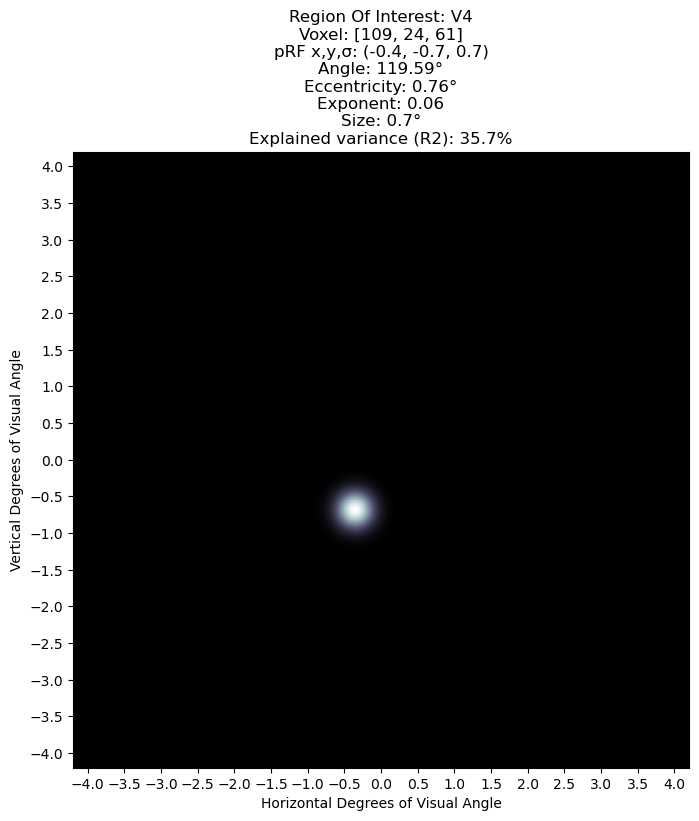

In [12]:
prf_info = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='gaussian', roi='V4',
                                        plot = 'y', excl_reason = 'n', sigma_min=.1, sigma_max = 4.2)


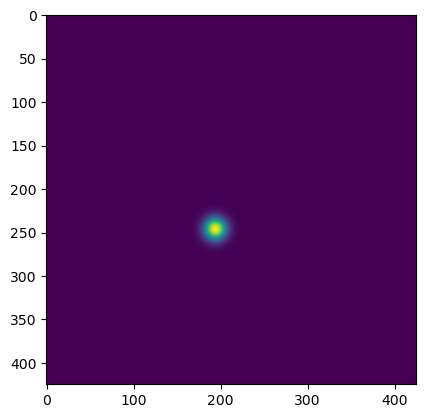

In [13]:
import matplotlib.pyplot as plt
import random
plo = np.zeros([2,5, 5])

plo[0,:,:] = np.ones([5,5])

plo

plt.imshow(prf_info['mask'])


In [14]:
stront = get_mask(dim=425, subject='subj01', binary_masks = vismask_dict, 
                prf_proc_dict=prf_dict, type='circle', roi='V1',
                plot='n', excl_reason='n', sigma_min=1, sigma_max=4.2, rand_seed=None)

print_dict_structure(stront)




mask
x
y
pix_radius
iterations
x_vox
y_vox
z_vox
x_deg
y_deg
angle
eccentricity
exponent
size
R2


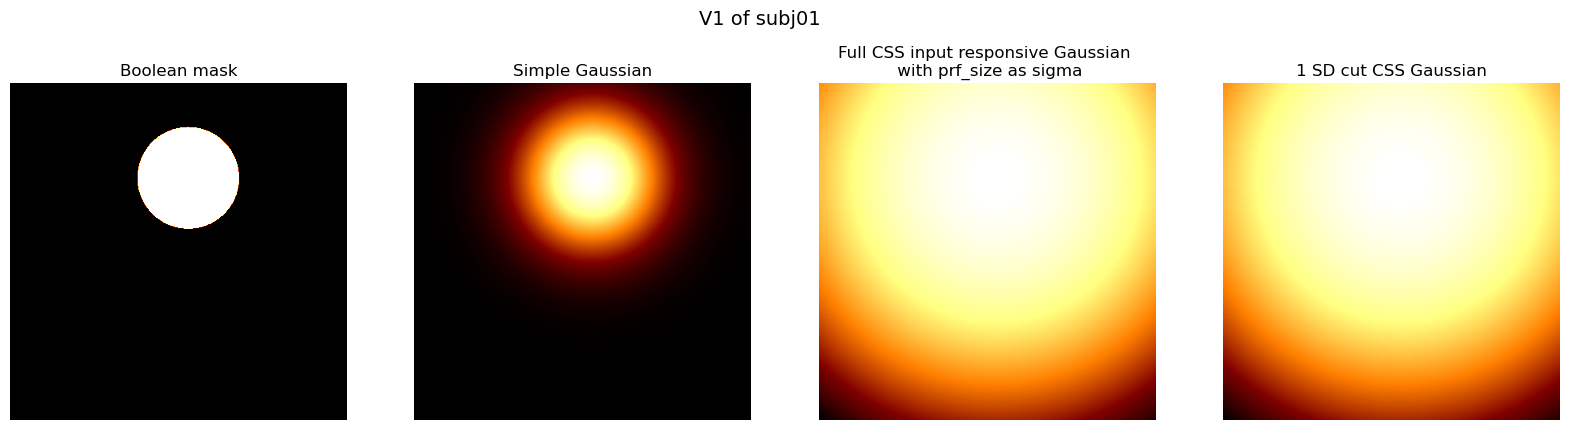

In [15]:
compare_masks(mask_dict =  vismask_dict, prf_dict = prf_dict)

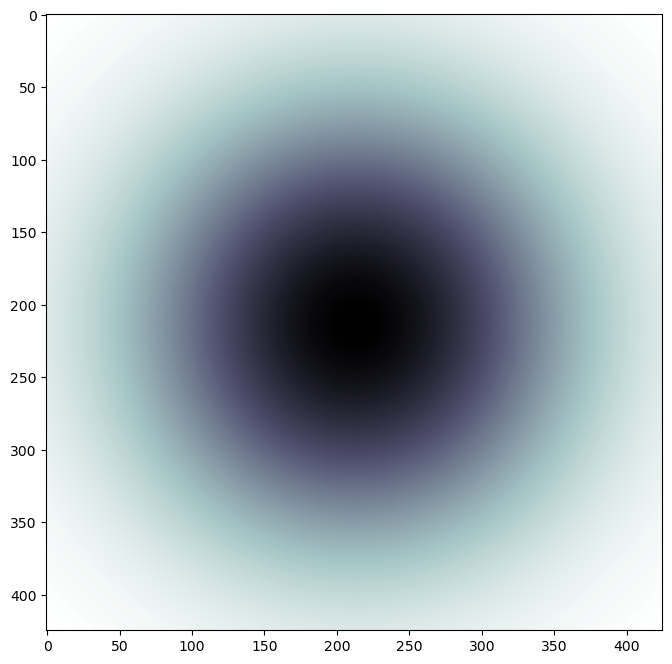

In [16]:
testmask = make_gaussian_2d(425, ((1 + 425) / 2), ((1 + 425) / 2), (2 * 425 / 8.4))

import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(8,8))
ax.imshow((1 - testmask), cmap = 'bone')

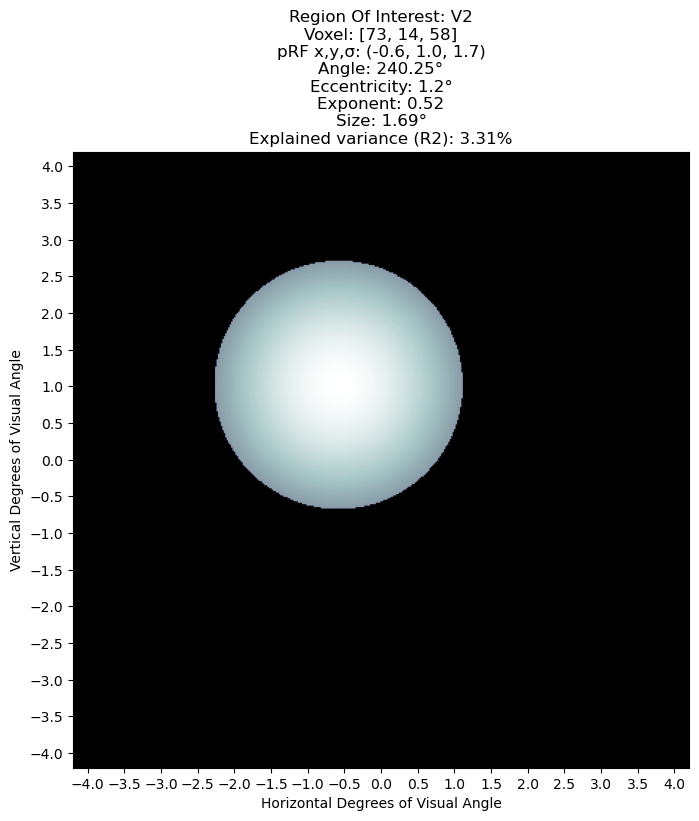

In [17]:
_ = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='cut_gaussian', roi='V2',
                                        plot = 'y', excl_reason = 'n', sigma_min=1, sigma_max = 4.2, rand_seed=11)


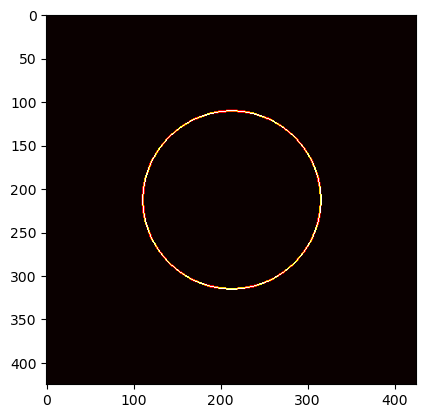

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [18]:
# This is the circle that corresponds to the middle 4 degs
zirkel = make_circle_mask(425, 213, 213, 2 * 425/8.4, fill='n', margin_width = 2)

plt.imshow(zirkel, cmap = 'hot')
plt.show()
with np.printoptions(threshold=np.inf):
    print(zirkel)

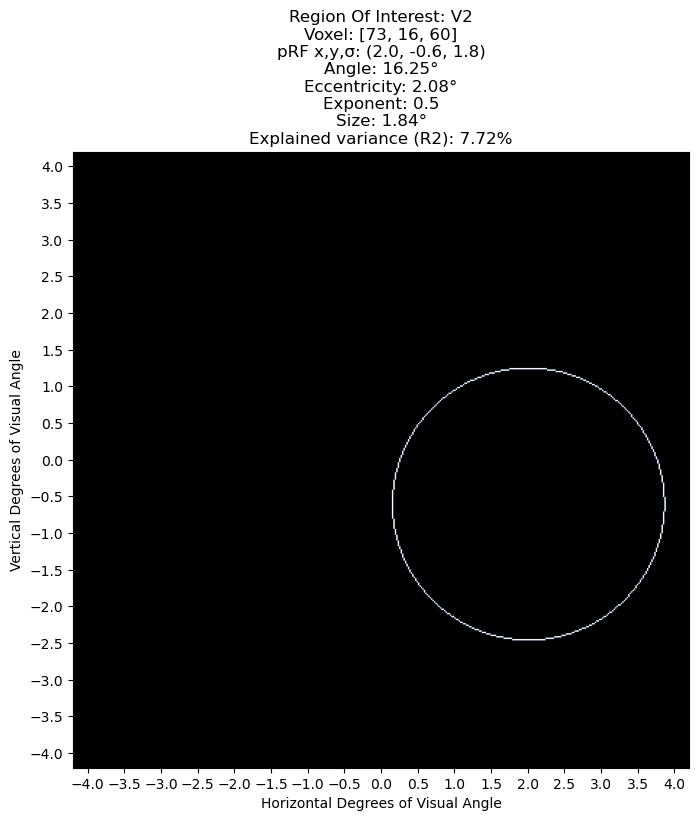

In [19]:
_ = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='outline', roi='V2',
                                        plot = 'y', excl_reason = 'n', sigma_min=1, sigma_max = 4.2)


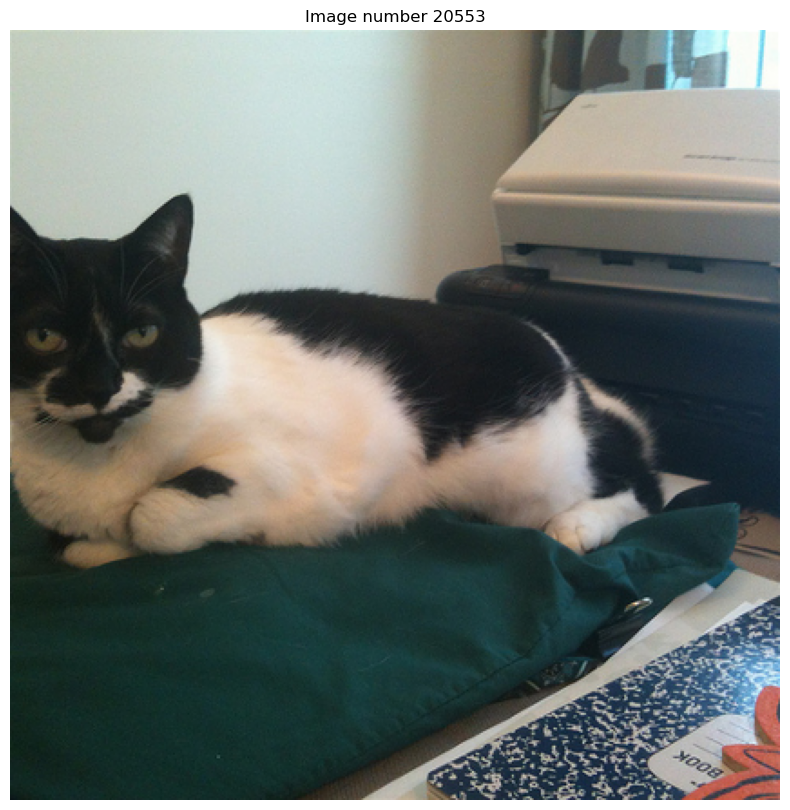

In [20]:
stim_img, img_no = show_stim()

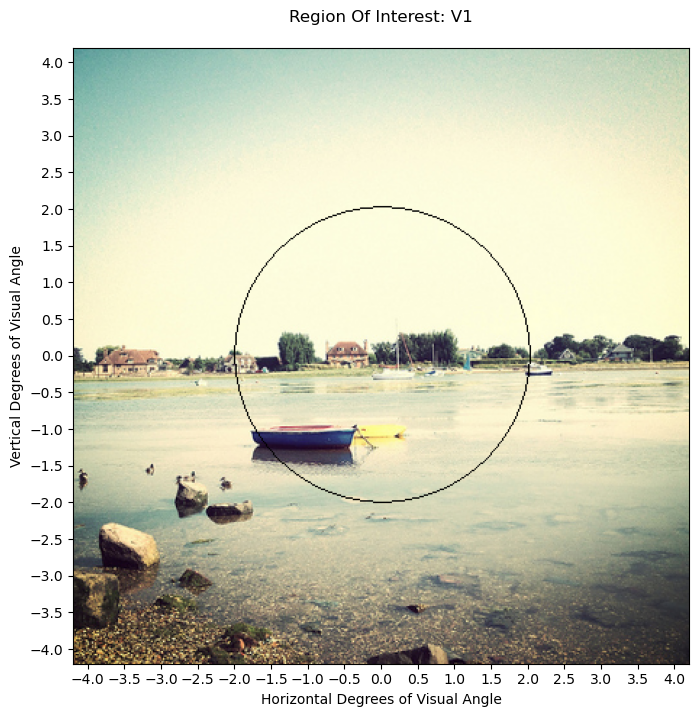

In [21]:
get_img_prf(show_stim(hide='y')[0], type='outline', binary_masks = vismask_dict, 
            prf_proc_dict = prf_dict, roi = 'V1', sigma_min = .1, 
            sigma_max = 4.2, rand_seed=None, invert='y', central = 'y')

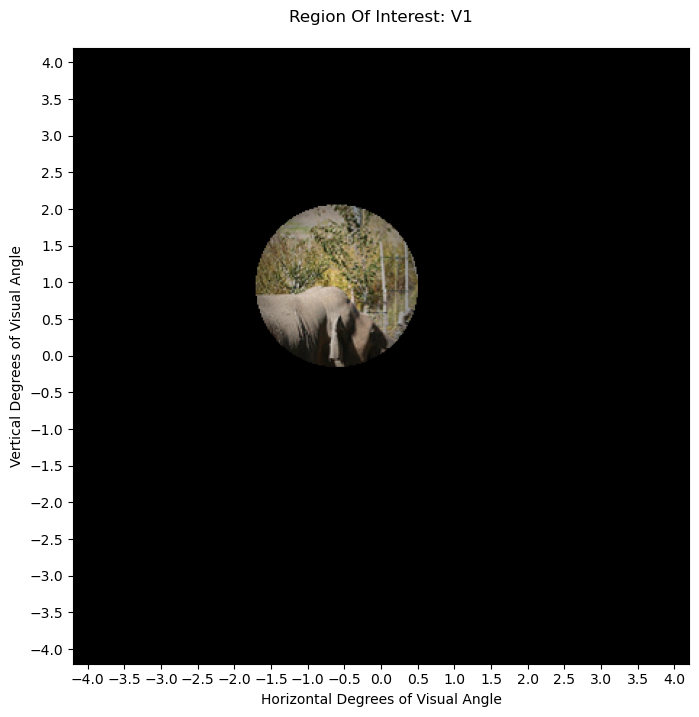

In [22]:


get_img_prf(show_stim(hide='y')[0], type='cut_gaussian', binary_masks = vismask_dict, 
            prf_proc_dict = prf_dict, roi = 'V1', sigma_min = .1, 
            sigma_max = 4.2, central='n', invert='n')

Write function to select the highest R2 values of the input by creating a boolean mask, or just a stacked list in which only the voxels are present that have the highest value?



In [23]:




# print_dict_structure(kak)

# print(kak['subj01']['V1_mask'])


# print_dict_structure(kak)

# print_dict_structure(prf_dict)


Okao nice this works, but I need to do this for every subj and every roi separately, so best to do it inside the heatmap function, as this one maps over that anyway, or well, it doesn't yet over the rois, but I can probably add that.

In [24]:
filter_dict = rsquare_selection(prf_dict, 1000, n_subjects=n_subjects)

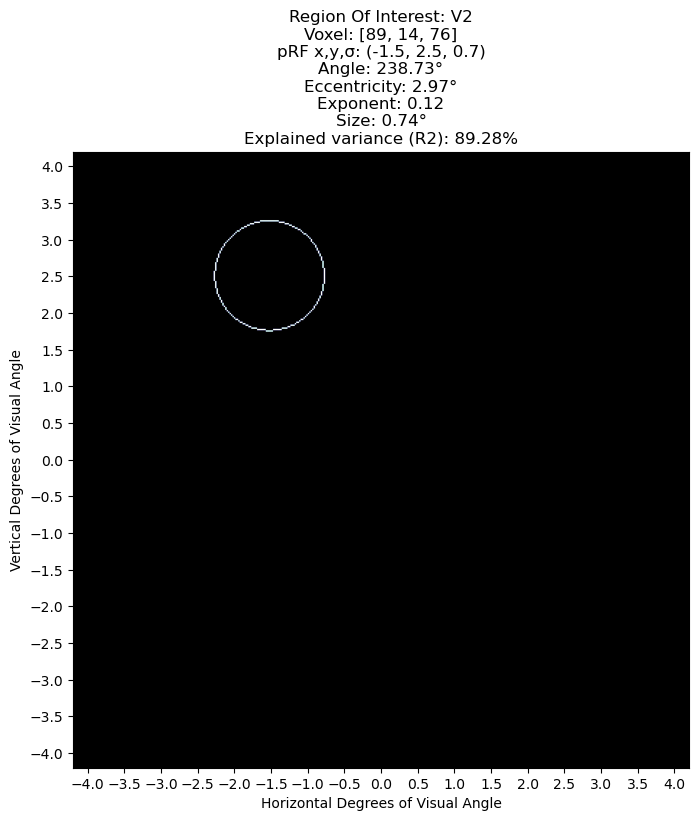

In [25]:


_ = get_mask(dim = 425, subject = 'subj05', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='outline', roi='V2',
                                        plot = 'y', excl_reason = 'y', sigma_min=.1, sigma_max = 4.2, 
                                        filter_dict = rsquare_selection(prf_dict, 100, n_subjects = n_subjects))


In [26]:
import numpy as np


kak = rsquare_selection(prf_dict, 1000, n_subjects=n_subjects)
print(np.max(prf_dict['subj01']['proc']['V1_mask']['R2']))
# Example larger array (7000, 4)
larger_array = prf_dict['subj01']['proc']['V1_mask']['R2']

# Example smaller array (100, 4)
  # Assuming it's a subset for the purpose of the example

# Extract x, y, z columns from the smaller array
smaller_xyz = kak['subj01']['V1_mask'][:, :3]

# Create a boolean mask for rows in the larger array where x, y, z match the smaller array
mask = np.any(np.all(larger_array[:, None, :3] == smaller_xyz, axis=-1), axis=1)

# Apply the boolean mask to get the filtered array
filtered_array = larger_array[mask]

# Example output shapes
print("Original Larger Array Shape:", larger_array.shape)
print("Filtered Array Shape:", filtered_array.shape)

# print(larger_array)
print('\n')
# print(smaller_xyz)

# print(filtered_array)

print(mask.shape)


smaller_xyz = rsq_dict['subj01']['V1_mask'][:, :3]
# filter = np.any(np.all(binary_masks[subject][f'{roi}_mask'][:, None, :3] == smaller_xyz, axis=-1), axis=1)
filter = np.any(np.all(prf_dict['subj01']['proc']['V1_mask']['angle'][:, None, :3] == smaller_xyz, axis=-1), axis=1)

larger_array[filter].shape

107.0
Original Larger Array Shape: (7887, 4)
Filtered Array Shape: (1000, 4)


(7887,)


(1000, 4)

In [27]:
musk = (np.ones((10,4))).astype(bool)

# print(kak['subj01']['V1_mask'][musk])

print(kak['subj03']['V1_mask'])

ui = range(0,2)

print(kak['subj01']['V1_mask'][ui])

# print(musk.astype(bool))
print(type(mask))

print(kak['subj01']['V1_mask'].shape[0])


[[68.      19.      51.      75.42703]
 [71.      14.      49.      75.43275]
 [77.      26.      51.      75.44907]
 ...
 [96.      23.      56.      88.07643]
 [97.      24.      56.      88.18322]
 [91.      15.      69.      88.27079]]
[[92.      24.      78.      69.53096]
 [85.      28.      74.      69.54248]]
<class 'numpy.ndarray'>
1000


In [28]:
# Create a dictionary for the top n R2 prf values, the amount of explained variance
# it does so for every visual roi and subject separately
def central_selection(prf_dict = None, central_degs = 4, rsq_masks = None, n_subjects = None):
    
    cs_dict = {}
    
    for subj_no in range (1, n_subjects + 1):
        subj_rsq = {}
        
        for roi in prf_dict[f'subj0{subj_no}']['proc'].keys():
            
            rsq_ar = prf_dict[f'subj0{subj_no}']['proc'][roi]['R2']
            rsq_sort = np.argsort(rsq_ar[:, -1])
            rsq_top = rsq_ar[rsq_sort[-top_n:]]
            subj_rsq[roi] = rsq_top
        rsq_dict[f'subj0{subj_no}'] = subj_rsq
    return rsq_dict

In [29]:
prf_dict['subj01']['nsd_dat']['eccentricity']['prf_range']

{'min': 8e-07, 'max': 1000.0, 'mean': 8.11153}

In [30]:
# def prf_select():
    # I want this to create a plot similar to the heatmaps, but also with the central circle in it. 
    # as arguments there need to be the amount of degrees that we want to see, and also a way of including a
    # strictness rule so you can choose whether the center or the entire pRF ought to be inside the center
    #
    

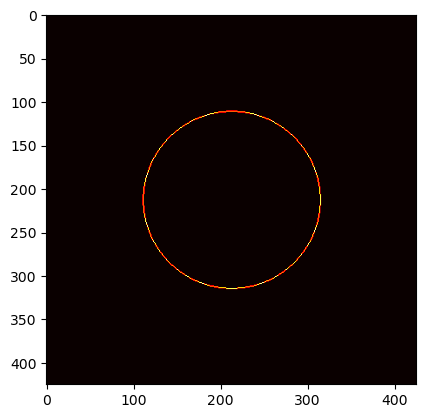

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [31]:
# This is the circle that corresponds to the middle 4 degs
zirkel = make_circle_mask(425, 213, 213, 2 * 425/8.4, fill='n')

plt.imshow(zirkel, cmap = 'hot')
plt.show()
with np.printoptions(threshold=np.inf):
    print(zirkel)

In [32]:
roi_flt = vismask_dict['subj01']['V1_mask']

prf_vec = random.sample(range(np.sum(roi_flt)), np.sum(roi_flt))



prf_dict['subj01']['proc']['V1_mask']['R2']


print(len(prf_vec))

print(prf_vec)

print(rsq_dict['subj01']['V1_mask'].shape[0])

7887
[7204, 6771, 2677, 6741, 742, 3026, 1976, 7224, 872, 2257, 6733, 3644, 6567, 3732, 646, 4748, 3633, 182, 388, 3148, 6851, 4442, 242, 58, 3482, 1616, 5490, 4769, 1111, 3280, 6047, 2840, 215, 7593, 6275, 5119, 2232, 2972, 783, 6085, 1087, 6177, 3671, 2537, 1441, 4648, 4207, 429, 6200, 346, 829, 5750, 5396, 7861, 5878, 6976, 1017, 2181, 3799, 6971, 6816, 3245, 1382, 2202, 4044, 6338, 7443, 4143, 2571, 3601, 5397, 3678, 7209, 1556, 5940, 6369, 2734, 4711, 2246, 768, 6747, 7167, 1332, 5881, 2690, 4217, 1587, 6561, 7570, 568, 1948, 1570, 6201, 2552, 4603, 5061, 5559, 1467, 3504, 4580, 3604, 152, 1518, 587, 7796, 2867, 2261, 5143, 6483, 2928, 6040, 4729, 4622, 5284, 1228, 240, 76, 7774, 2806, 7104, 475, 3011, 340, 1419, 5858, 5922, 824, 2077, 1291, 2995, 7486, 6476, 2155, 3967, 396, 5846, 2906, 423, 5832, 1777, 5513, 2653, 71, 882, 7564, 6169, 6308, 380, 1007, 3746, 5606, 1455, 654, 2046, 1507, 97, 3494, 6777, 2821, 24, 723, 6529, 5030, 5580, 1279, 6396, 6950, 6660, 616, 802, 3074, 6101,

Subject: subj01, Voxel 1 out of 500 found
Subject: subj01, Voxel 2 out of 500 found
Subject: subj01, Voxel 3 out of 500 found
Discarding pRF mask for voxel [64, 20, 75] due to:
   - x out of bounds
   -  pRF outside of center 4° visual degrees
Subject: subj01, Voxel 4 out of 500 found
Discarding pRF mask for voxel [70, 17, 81] due to:
   - x out of bounds
   -  pRF outside of center 4° visual degrees
Discarding pRF mask for voxel [64, 19, 75] due to:
   -  pRF outside of center 4° visual degrees
Discarding pRF mask for voxel [67, 12, 70] due to:
   -  pRF outside of center 4° visual degrees
Discarding pRF mask for voxel [89, 25, 77] due to:
   -  pRF outside of center 4° visual degrees
Discarding pRF mask for voxel [71, 19, 72] due to:
   -  pRF outside of center 4° visual degrees
Discarding pRF mask for voxel [67, 21, 77] due to:
   - x out of bounds
   -  pRF outside of center 4° visual degrees
Discarding pRF mask for voxel [71, 10, 77] due to:
   -  pRF outside of center 4° visual d

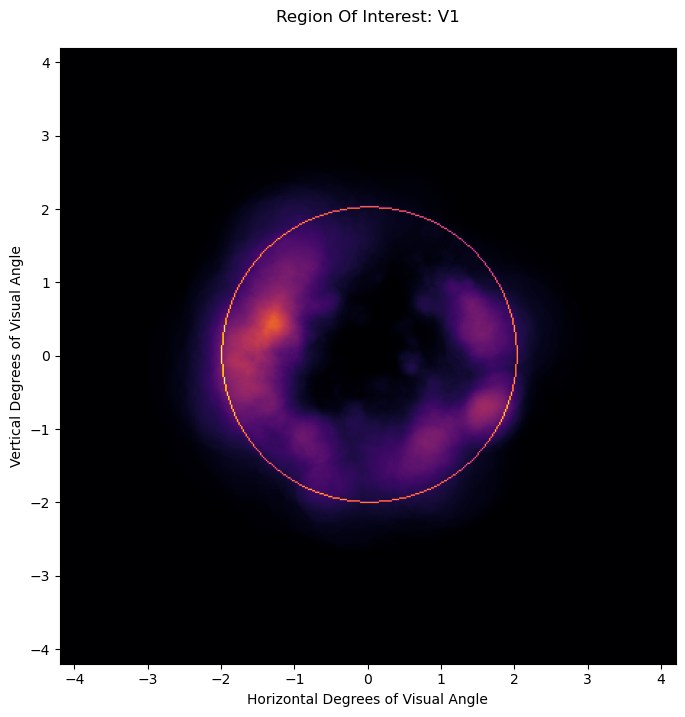

In [37]:
# Working heatmap call script.
import random
import time

start = time.time()

heatmap, iter, end_premat, roi = prf_heatmap(500, binary_masks=vismask_dict, prf_proc_dict=prf_dict,
                                             mask_type='cut_gaussian', cmap='inferno', print_prog='y', 
                                             roi='V1', sigma_min=0, sigma_max = 4.2, ecc_max = 2, subjects='all', 
                                             outline = make_circle_mask(425, 213, 213, 2 * 425/8.4, fill='n'), 
                                             filter_dict = rsquare_selection(prf_dict, 1000, n_subjects = n_subjects))

end = time.time()
print("Runtime:", np.round(end - start, 3), "seconds")

if end_premat is not True:
    print("There were", iter, "out of", np.sum(vismask_dict['subj01'][f'{roi}_mask']), "pRFs considered")

(425, 425)


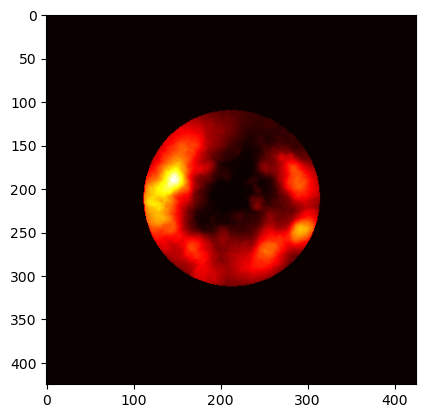

[[0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      

In [72]:
print(heatmap.shape)


middle_filter = make_circle_mask(425, 213, 213, 2 * 425/8.4, fill='y', margin_width = 100)

plt.imshow(np.flipud(middle_filter) * np.flipud(heatmap), cmap = 'hot')
plt.show()
with np.printoptions(threshold=np.inf):
    print(np.flipud(middle_filter) * np.flipud(heatmap))




Discarding pRF mask for voxel [65, 23, 77] due to:
   - x out of bounds
   -  pRF outside of center 4° visual degrees
Discarding pRF mask for voxel [79, 10, 82] due to:
   - y out of bounds
   -  pRF outside of center 4° visual degrees
Subject: subj01, Voxel 1 out of 500 found
Discarding pRF mask for voxel [84, 27, 78] due to:
   - x out of bounds
   -  pRF outside of center 4° visual degrees
Discarding pRF mask for voxel [90, 23, 79] due to:
   -  pRF outside of center 4° visual degrees
Discarding pRF mask for voxel [71, 17, 81] due to:
   - x out of bounds
   -  pRF outside of center 4° visual degrees
Discarding pRF mask for voxel [86, 16, 79] due to:
   -  pRF outside of center 4° visual degrees
Subject: subj01, Voxel 2 out of 500 found
Discarding pRF mask for voxel [77, 11, 81] due to:
   - y out of bounds
   -  pRF outside of center 4° visual degrees
Discarding pRF mask for voxel [90, 22, 80] due to:
   -  pRF outside of center 4° visual degrees
Subject: subj01, Voxel 3 out of 500

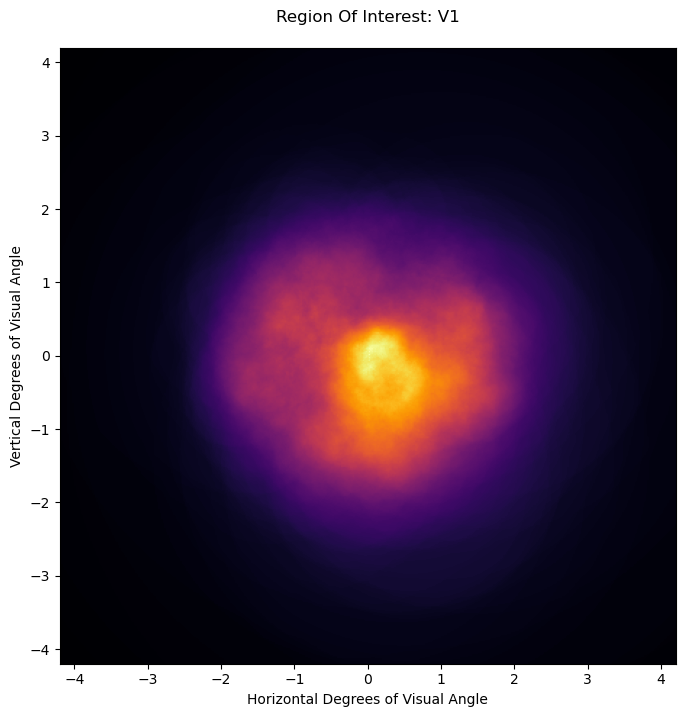

In [35]:
# Working heatmap call script.

import time


start = time.time()

heatmap_full, iter, end_premat, roi = prf_heatmap(500, binary_masks=vismask_dict, prf_proc_dict=prf_dict, mask_type='cut_gaussian', cmap='inferno',\
                                  print_prog='y', roi='V1', sigma_min=0, sigma_max=4.2, ecc_max = 2, subjects='all')

end = time.time()
print("Runtime:", np.round(end - start, 3), "seconds")

if end_premat is not True:
    print("There were", iter, "out of", np.sum(vismask_dict['subj01'][f'{roi}_mask']), "pRFs considered")

In [ ]:
# !{sys.executable} -m pip install nsdcode # This does not work, the ones below do
# !{sys.executable} -m pip install -r /home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode/requirements.txt
# !{sys.executable} -m pip install /home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode/.


In [ ]:

# !{sys.executable} -m pip install numpy